In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("../data/SAT_GPA.csv")
df.shape

(84, 2)

In [3]:
training = df[0:60]
testing = df[60:df.shape[0]]

In [4]:
X = training["SAT"]
Y = training["GPA"]

## Method 1

In [5]:
cov = np.cov(X, Y)
cov = cov[0, 1] * (X.shape[0] - 1)
var = np.var(X) * (X.shape[0])

x_h = np.mean(X)
y_h = np.mean(Y)

w1 = cov/var
w0 = y_h - w1 * x_h

print(f"w0 = {w0}\nw1 = {w1}")

w0 = 0.8894850818939775
w1 = 0.0012857028103771674


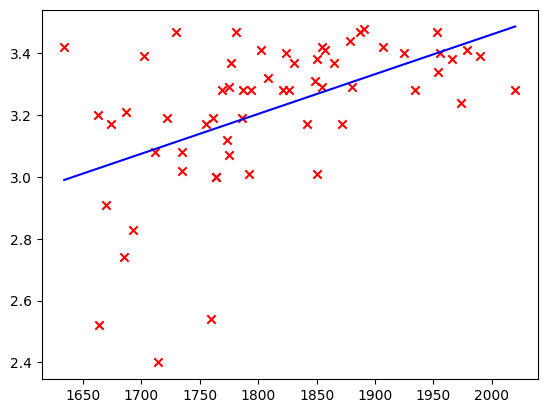

In [6]:
x = np.linspace(np.min(X), np.max(X), 2)
y = w0 + w1 * x

plt.plot(x, y, color="blue")
plt.scatter(X, Y, color="red", marker="x")

In [7]:
test_x = testing["SAT"]
test_y = testing["GPA"]

y_pred = w0 + w1 * test_x


sse = sum((y_pred - test_y)**2)
sse

1.678686343837865

## Method 2

0.8894850821428647
0.001285702810240121


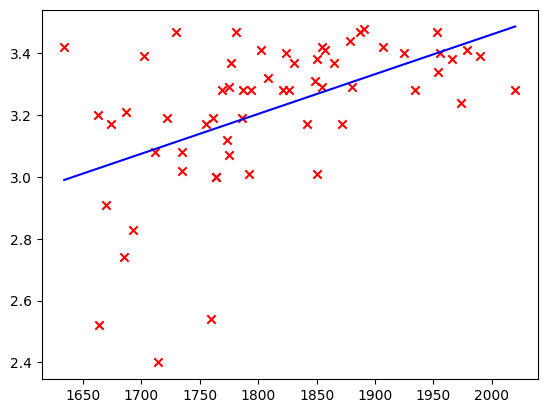

In [8]:
X_2 = np.array([training["SAT"]])
Y_2 = np.array([training["GPA"]])

ones = np.ones(X_2.shape[1])

Xbar = np.row_stack((ones, X_2)).T

A = Xbar.T @ Xbar
b = Xbar.T @ Y_2.T

inverted_A = np.linalg.pinv(A)

w = (inverted_A @ b).flatten()
w0, w1 = w

print(w0)
print(w1)


plt.plot(x, y, color="blue")
plt.scatter(X_2, Y_2,color="red", marker="x")



In [9]:
test_x = testing["SAT"]
test_y = testing["GPA"]

y_pred = w0 + w1 * test_x


sse = sum(np.abs(y_pred - test_y)**2)
sse

1.678686343975731